In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np                                         # Linear algebra
import pandas as pd                                        # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                            # Plots
from sklearn.ensemble import RandomForestClassifier        # Random forest
from sklearn import metrics                                # Accuracy measurement
from sklearn.metrics import plot_confusion_matrix          # Confusion matrix evaluation


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Read data 
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describe data
train_df.describe()
# Get size 
print(f"Rows: {train_df.shape[0]}, Cols: {train_df.shape[1]}")

Rows: 891, Cols: 12


In [4]:
# Check how many missing values in train dataset
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Check how many missing values in test dataset
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Drop cabin since it contains mostly missing values
train_df.drop("Cabin", 1)
test_df.drop("Cabin", 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [7]:
# Replace missing ages with mean age
train_df['Age']= train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Create variable for number of family members
train_df['Family'] = train_df.loc[:,['SibSp','Parch']].sum(axis=1) 
test_df['Family'] = test_df.loc[:,['SibSp','Parch']].sum(axis=1)

# Replace missing fare in test set with mean fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Text(0, 0.5, 'Frequency')

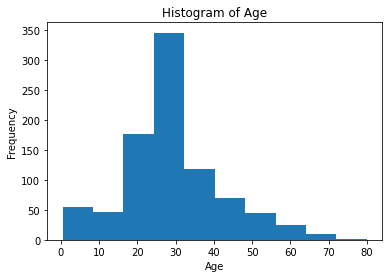

In [8]:
# Show histogram of Age
plt.hist(train_df['Age'], 10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

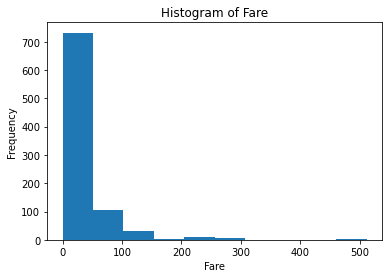

In [9]:
# Show histogram of Fare
plt.hist(train_df['Fare'], 10)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [10]:
# Calculate the percent of women that survived
women = train_df.loc[train_df.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

# Calculate the percent of men that survived
men = train_df.loc[train_df.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print(f"{rate_women *100:.2f}% of women survived")
print(f"{rate_men * 100:.2f}% of men survived")

74.20% of women survived
18.89% of men survived


In [11]:
# Show percentage of passangers who survived over 40
over_40 = train_df.loc[train_df.Age > 40]['Survived']
over_40_calc = sum(over_40)/len(over_40)
print(f"{over_40_calc * 100:.2f}% of passangers over 40 survived")

36.67% of passangers over 40 survived


In [12]:
# Show percentage of passengers with fares lower than the mean that survived
lower_fares = train_df.loc[train_df.Fare < train_df['Fare'].mean()]['Survived']
lower_fares_calc = sum(lower_fares)/len(lower_fares)
print(f"{lower_fares_calc * 100:.2f}% of passangers who paid lower fares survived")

31.76% of passangers who paid lower fares survived


In [13]:
# Bin the age variable 
train_df['ageBinned'] = pd.cut(train_df['Age'], bins=[0,18,35,65,85], labels=["Child", "Young Adult", "Adult", "Elderly"])
test_df['ageBinned'] = pd.cut(test_df['Age'], bins=[0,18,35,65,85], labels=["Child", "Young Adult", "Adult", "Elderly"])

# Show mean and max fare
print(f"The mean fare is {train_df['Fare'].mean():.2f}")
print(f"The max fare is {train_df['Fare'].max():.2f}")

# Show mean and max family size
print(f"The max family size is {train_df['Family'].max() + 1}")
print(f"The average family size is {train_df['Family'].mean() + 1:.0f}")

The mean fare is 32.20
The max fare is 512.33
The max family size is 11
The average family size is 2


In [14]:
# Bin the age variable 
train_df['fareBinned'] = pd.cut(train_df['Fare'], bins=[0,15,32,513], labels=["Low", "Low/Average", "High"])
test_df['fareBinned'] = pd.cut(test_df['Fare'], bins=[0,15,32,513], labels=["Low", "Low/Average", "High"])

# Bin the famile variable 
train_df['familyBinned'] = pd.cut(train_df['Family'], bins=[0,1,2,3], labels=["None", "Small family", "Large family"])
test_df['familyBinned'] = pd.cut(test_df['Family'], bins=[0,1,2,3], labels=["None", "Small family", "Large family"])

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,ageBinned,fareBinned,familyBinned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young Adult,Low,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Adult,High,None
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young Adult,Low,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Young Adult,High,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Young Adult,Low,NaN


In [15]:
# Separate training and validation sets
train_data = train_df.sample(frac=0.85, random_state=0)
val_data = train_df.drop(train_data.index)

# Drop labels from validation set
val_labels = val_data["Survived"]
val_data = val_data.drop("Survived", 1)

# Print size of new training and validation sets
print(f"Training Rows: {train_data.shape[0]}, Training Cols: {train_data.shape[1]}")
print(f"Validation Rows: {val_data.shape[0]}, Validation Cols: {val_data.shape[1]}")

# Verify correct column dropped
val_data.head()

Training Rows: 757, Training Cols: 16
Validation Rows: 134, Validation Cols: 15


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,ageBinned,fareBinned,familyBinned
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Child,Low/Average,None
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,Young Adult,High,NaN
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,Q,0,Young Adult,Low,NaN
42,43,3,"Kraeff, Mr. Theodor",male,28.0,0,0,349253,7.8958,NaN,C,0,Young Adult,Low,NaN
47,48,3,"O'Driscoll, Miss. Bridget",female,28.0,0,0,14311,7.7500,NaN,Q,0,Young Adult,Low,NaN


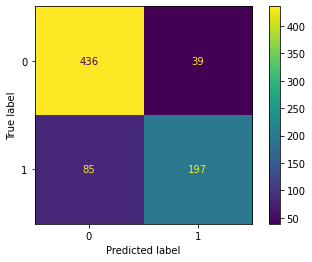

In [16]:
# Select features
features = ["Sex","fareBinned", "Pclass", "familyBinned", "ageBinned", "SibSp", "Parch"]

# Separate training labels
y_train = train_data["Survived"]
x_train = pd.get_dummies(train_data[features])
x_val = pd.get_dummies(val_data[features])
x_test = pd.get_dummies(test_df[features])

# Fit model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)

# Get train and val predictions 
train_predictions = model.predict(x_train)
val_predictions = model.predict(x_val)

# Confusion matrix for train predictions
plot_confusion_matrix(model, x_train, y_train) 

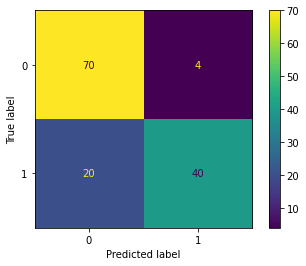

In [17]:
# Confusion matrix for validation set
plot_confusion_matrix(model, x_val, val_labels) 

In [18]:
print(f"Training Accuracy: {metrics.accuracy_score(y_train, train_predictions) * 100:.2f}%")
print(f"Validation Accuracy: {metrics.accuracy_score(val_labels, val_predictions) * 100:.2f}%")

Training Accuracy: 83.62%
Validation Accuracy: 82.09%


In [19]:
# Predict test set
test_predictions = model.predict(x_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': test_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
